In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9']
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\BCW\BCW_AE_5.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
0,5,NaN,1.0,1,NaN,1.0,3.0,1.0,1
1,5,4.0,4.0,5,7.0,10.0,3.0,2.0,1
2,3,1.0,1.0,1,2.0,2.0,3.0,1.0,1
3,6,NaN,8.0,1,NaN,4.0,3.0,7.0,1
4,4,1.0,NaN,3,2.0,1.0,NaN,1.0,1
...,...,...,...,...,...,...,...,...,...
678,3,1.0,NaN,1,NaN,1.0,2.0,1.0,1
679,2,1.0,NaN,1,2.0,NaN,3.0,1.0,1
680,5,10.0,10.0,10,4.0,10.0,5.0,6.0,3
681,1,1.0,1.0,3,2.0,1.0,1.0,1.0,1


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
int64		column 1	0
float64		column 2	34
float64		column 3	112
int64		column 4	0
float64		column 5	48
float64		column 6	34
float64		column 7	32
float64		column 8	32
int64		column 9	0


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
count,683.000000,649.000000,571.000000,683.000000,635.000000,649.000000,651.000000,651.000000,683.000000
mean,4.442167,3.114022,3.190893,2.830161,3.245669,3.526965,3.399386,2.855607,1.603221
std,2.820761,3.035683,2.948146,2.864562,2.236659,3.637888,2.400692,3.032751,1.732674
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000
50%,4.000000,1.000000,2.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,4.000000,4.000000,1.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


<AxesSubplot:>

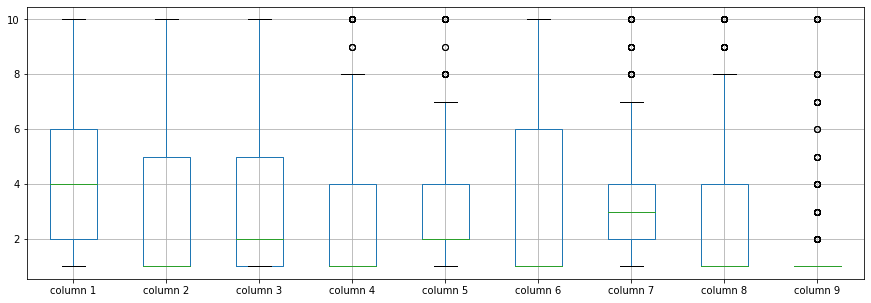

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1    4.442167
column 2    3.114022
column 3    3.190893
column 4    2.830161
column 5    3.245669
column 6    3.526965
column 7    3.399386
column 8    2.855607
column 9    1.603221
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
column 1,1.000000,0.645590,0.644403,0.487829,0.518840,0.593042,0.559328,0.523134,0.350957
column 2,0.645590,1.000000,0.905216,0.707231,0.747613,0.706574,0.739751,0.699985,0.466037
column 3,0.644403,0.905216,1.000000,0.664020,0.716521,0.707615,0.712911,0.708337,0.438456
column 4,0.487829,0.707231,0.664020,1.000000,0.591566,0.668572,0.666981,0.589902,0.418898
column 5,0.518840,0.747613,0.716521,0.591566,1.000000,0.589689,0.592392,0.629666,0.489508
column 6,0.593042,0.706574,0.707615,0.668572,0.589689,1.000000,0.679891,0.579279,0.340686
column 7,0.559328,0.739751,0.712911,0.666981,0.592392,0.679891,1.000000,0.643728,0.342223
column 8,0.523134,0.699985,0.708337,0.589902,0.629666,0.579279,0.643728,1.000000,0.428156
column 9,0.350957,0.466037,0.438456,0.418898,0.489508,0.340686,0.342223,0.428156,1.000000


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [9,9+65,9+65+65,9+65+65,9+65+65+65+65,9+65+65+65,9+65+65,9+65,9], vae_layer = False, seed = 650)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [9]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 34.913480667840865
Epoch: 1 , loss: 34.807936305091495
Epoch: 2 , loss: 34.698069027491975
Epoch: 3 , loss: 33.910296303885325
Epoch: 4 , loss: 32.02794688088553
Epoch: 5 , loss: 30.403408459254674
Epoch: 6 , loss: 29.798042660667782
Epoch: 7 , loss: 29.08769262404669
Epoch: 8 , loss: 28.854518663315545
Epoch: 9 , loss: 27.95370478857131
Epoch: 10 , loss: 28.169933682396298
Epoch: 11 , loss: 27.71745777130127
Epoch: 12 , loss: 27.466085524786088
Epoch: 13 , loss: 27.082711696624756
Epoch: 14 , loss: 26.260624885559082
Epoch: 15 , loss: 26.32697341555641
Epoch: 16 , loss: 25.23443044934954
Epoch: 17 , loss: 25.23597376687186
Epoch: 18 , loss: 26.250771522521973
Epoch: 19 , loss: 24.7391878309704
Epoch: 20 , loss: 24.947381337483723
Epoch: 21 , loss: 25.23843238467262
Epoch: 22 , loss: 24.40561698731922
Epoch: 23 , loss: 24.239204815455846
Epoch: 24 , loss: 24.05500196275257
Epoch: 25 , loss: 25.035844439

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(683, 9)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1    3.0
column 2    1.0
column 3    1.0
column 4    1.0
column 5    2.0
column 6    1.0
column 7    2.0
column 8    1.0
column 9    1.0
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\BCW.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
0,0,0.466087,0.000000,0,-0.572692,0.000000,0.000000,0.0,0
1,0,0.000000,0.000000,0,0.000000,0.000000,0.000000,0.0,0
2,0,0.000000,0.000000,0,0.000000,0.000000,0.000000,0.0,0
3,0,-6.256190,0.000000,0,-1.353181,0.000000,0.000000,0.0,0
4,0,0.000000,0.458855,0,0.000000,0.000000,-1.418003,0.0,0
...,...,...,...,...,...,...,...,...,...
678,0,0.000000,3.841620,0,2.675368,0.000000,0.000000,0.0,0
679,0,0.000000,-0.186197,0,0.000000,-0.122536,0.000000,0.0,0
680,0,0.000000,0.000000,0,0.000000,0.000000,0.000000,0.0,0
681,0,0.000000,0.000000,0,0.000000,0.000000,0.000000,0.0,0


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(53.813463109890634, 335.3281974424459)

In [17]:
NRMS=numerator/denominator
NRMS


0.16047998206034228

In [18]:
new_df.iloc[66,:]

column 1    1.0
column 2    3.0
column 3    3.0
column 4    2.0
column 5    2.0
column 6    1.0
column 7    7.0
column 8    2.0
column 9    1.0
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
0,5,1.466087,1.000000,1,1.427308,1.000000,3.000000,1.0,1
1,5,4.000000,4.000000,5,7.000000,10.000000,3.000000,2.0,1
2,3,1.000000,1.000000,1,2.000000,2.000000,3.000000,1.0,1
3,6,1.743810,8.000000,1,1.646819,4.000000,3.000000,7.0,1
4,4,1.000000,1.458855,3,2.000000,1.000000,1.581997,1.0,1
...,...,...,...,...,...,...,...,...,...
678,3,1.000000,4.841620,1,4.675368,1.000000,2.000000,1.0,1
679,2,1.000000,0.813803,1,2.000000,0.877464,3.000000,1.0,1
680,5,10.000000,10.000000,10,4.000000,10.000000,5.000000,6.0,3
681,1,1.000000,1.000000,3,2.000000,1.000000,1.000000,1.0,1


In [21]:
imputations[-1].to_excel("BCW_AE_5(imp).xlsx", index=False, header=False)